In [1]:
import os

experiment_path = './data/Error Experiment #1'

if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

In [2]:
from map_maker import cluttered_map, save_map
from Turtlebot_Kinematics import *
from environment import Environment, load_ENV
from Runner import ControllMode, Runner
from pso_controller import Multi_PSO_Controller
from dwa_controller import DWA_Controller

def set_errors(env:Environment, error_string:str):
    env.use_errors = True
    if error_string == "normal":
        pass
    elif error_string == "speed":
        env.deg_error = 0
        env.position_error = 0
        env.sensor_error = 0
    elif error_string == "position":
        env.speed_error = 0
        env.sensor_error = 0
    elif error_string == "sensor":
        env.speed_error = 0
        env.deg_error = 0
        env.position_error = 0

error_strings = ["normal", "speed", "position", "sensor"]

run_num = 31
dt = 0.1
max_index = None

# map parameters
map_obs = 8
map_size = 50
map_unknown = False
map_name = f"cluttered_{map_obs}obs_{map_size}x{map_size}_{'unknown' if map_unknown else 'known'}"

for i in range(24, run_num):
    # create run foder
    run_path = f"{experiment_path}/{i}"
    if not os.path.exists(run_path):
        os.makedirs(run_path)
    for err in error_strings:  
        # create run foder
        run_path = f"{experiment_path}/{i}/{err}"
        if not os.path.exists(run_path):
            os.makedirs(run_path)

        # create and save map
        run_map = cluttered_map(map_obs, map_size, map_unknown)
        map_path = f"{run_path}/{map_name}"
        save_map(run_map, map_name, run_path)

        # run and save long MultiPSO data
        kinematic = unicycleKin()
        long_MultiPSO_ENV = Environment.from_dict(run_map, kinematic, record=True)
        set_errors(long_MultiPSO_ENV, err)
        long_MultiPSO_controller = Multi_PSO_Controller(5, kinematic, 10, 0.75, 10)
        if max_index is None:
            max_index = long_MultiPSO_ENV.goal_travel_time / dt + 200
        else: max_index = max(max_index, long_MultiPSO_ENV.goal_travel_time / dt + 200)
        long_MultiPSO_Runner = Runner(
            long_MultiPSO_ENV, 
            ControllMode.MultiPSO, 
            long_MultiPSO_controller, 
            max_step = max_index,
            dt = dt,
            save_path= f"{run_path}/long_MultiPSO_data"
        )
        long_MultiPSO_Runner.loop()

        # run and save short MultiPSO data
        short_MultiPSO_ENV = Environment.from_dict(run_map, kinematic, record=True)
        set_errors(short_MultiPSO_ENV, err)
        short_MultiPSO_controller = Multi_PSO_Controller(10, kinematic, 5, 1.5, 10)
        if max_index is None:
            max_index = short_MultiPSO_ENV.goal_travel_time / dt + 200
        else: max_index = max(max_index, short_MultiPSO_ENV.goal_travel_time / dt + 200)
        short_MultiPSO_Runner = Runner(
            short_MultiPSO_ENV, 
            ControllMode.MultiPSO, 
            short_MultiPSO_controller, 
            max_step = max_index,
            dt = dt,
            save_path= f"{run_path}/short_MultiPSO_data"
        )
        short_MultiPSO_Runner.loop()

        # run and save DWA data
        DWA_ENV = Environment.from_dict(run_map, kinematic, record=True)
        set_errors(DWA_ENV, err)
        DWA_controller = DWA_Controller(20, kinematic, virtual_dt=2.0)
        DWA_controller.heading_koeff = 30
        DWA_controller.speed_koeff = 30
        DWA_Runner = Runner(
            DWA_ENV, 
            ControllMode.DWA, 
            DWA_controller, 
            max_step = max_index,
            dt = dt,
            save_path= f"{run_path}/DWA_data"
        )
        DWA_Runner.loop()


pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
# 1
stepping (15.0, -0.015761495823367944)
changing offset
offset [-15.38376386   4.34097839   0.04796032]
# 2
stepping (14.831503707077374, -0.202288096410344)
changing offset
offset [-0.11496001  2.07971204 -0.07166449]
# 3
stepping (14.983776970978553, 0.6367366091590931)
changing offset
offset [-9.18398881  1.03443007  0.05565847]
# 4
stepping (14.986740712963641, -0.023166385608589066)
changing offset
offset [-10.68899374  -3.02661893   0.02581639]
# 5
stepping (14.978598180019619, -0.07885990253704143)
changing offset
offset [-2.58025781  0.92871512  0.01183792]
# 6
stepping (14.980883780956132, -0.35913415436577406)
changing offset
offset [-4.89427345 -1.67232428 -0.1029049 ]
# 7
stepping (14.985248748392483, -0.011015913795476026)
changing offset
offset [-1.21143954  2.71646684 -0.01394109]
# 8
stepping (14.9897465306999, -0.09948837571363077)
changing offset
offset

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 42.17605496772809 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 90
best: 40.38178085846181 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 91
best: 40.112955857456825 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 92
best: 40.33317155975689 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 93
best: 41.07527025804414 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 94
best: 41.801407104883346 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 95
best: 42.240436035409495 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 96
best: 42.30383866102383 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 97
best: 41.6872463122117 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 98
best: 40.81055059222196 (15.0, -0.9

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 45.89810314540502 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 400
best: 40.90543301009514 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 401
best: 36.21288239834325 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 402
best: 31.735920139486648 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 403
best: 27.38553262772873 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 404
best: 23.634590674552747 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 405
best: 20.033808545714095 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 406
best: 16.773475184249882 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 407
best: 13.857579882762412 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 408
best:

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (-5.5652747189734795, 0.23801751010251648)
changing offset
offset [0. 0. 0.]
# 289
stepping (-2.823238089777016, 0.22459694374234482)
changing offset
offset [0. 0. 0.]
# 290
stepping (1.9524887188009705, 0.05414539211139499)
changing offset
offset [0. 0. 0.]
# 291
stepping (2.1670667900247906, 0.05901405941877515)
changing offset
offset [0. 0. 0.]
# 292
stepping (4.0504617016155535, 0.09947342925325116)
changing offset
offset [0. 0. 0.]
# 293
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 294
stepping (7.519727986902128, 0.6250692171801286)
changing offset
offset [0. 0. 0.]
# 295
stepping (2.619821927060645, 0.9)
changing offset
offset [0. 0. 0.]
# 296
stepping (-15.0, 0.6148218479162585)
changing offset
offset [0. 0. 0.]
# 297
stepping (-15.0, 0.49155296502044216)
changing offset
offset [0. 0. 0.]
# 298
stepping (15.0, -0.40616159832889953)
changing offset
offset [0. 0. 0.]
# 299
stepping (14.319971000838937, -0.6935106629875638)
changing offset
offset [0. 0. 0.]
# 

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 20.169009814410728 (15.0, -0.4263157894736842)
is unyKin
stepping (15.0, 0.4263157894736842)
changing offset
offset [0. 0. 0.]
# 21
best: 17.195913093279636 (15.0, -0.23684210526315785)
is unyKin
stepping (15.0, 0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 22
best: 24.432774725965977 (15.0, -0.23684210526315785)
is unyKin
stepping (15.0, 0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 23
best: 29.015674579584196 (15.0, -0.4263157894736842)
is unyKin
stepping (15.0, 0.4263157894736842)
changing offset
offset [0. 0. 0.]
# 24
best: 29.936511730044998 (15.0, -0.23684210526315785)
is unyKin
stepping (15.0, 0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 25
best: 35.620836934726825 (15.0, -0.7105263157894737)
is unyKin
stepping (15.0, 0.7105263157894737)
changing offset
offset [0. 0. 0.]
# 26
best: 34.06035044310224 (15.0, -0.14210526315789473)
is unyKin
stepping (15.0, 0.14210526315789473)
changing offset
offset [0. 0. 0.]
# 27
best: 34.12856722100898 (15

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


best: 59.88035251599898 (15.0, 0.3315789473684211)
is unyKin
stepping (15.0, -0.3315789473684211)
changing offset
offset [0. 0. 0.]
# 73
best: 59.896749623511354 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 74
best: 59.91066943445929 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 75
best: 59.923928473529024 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 76
best: 59.935994381561294 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 77
best: 59.946418381212084 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 78
best: 59.95456085746764 (15.0, 0.23684210526315785)
is unyKin
stepping (15.0, -0.23684210526315785)
changing offset
offset [0. 0. 0.]
# 79
best: 59.96180978553895 (

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 17.832524117966642 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 167
best: 17.100083838057465 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 168
best: 17.042815248712802 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 169
best: 16.285283662718626 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 170
best: 16.189084968736537 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 171
best: 15.430981635392122 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offse

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


# 190
best: 7.966563403868019 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 191
best: 7.213360249343708 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 192
best: 7.118999657013742 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 193
best: 6.364056035116889 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 194
best: 6.273957562627441 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 195
best: 5.551427382147779 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offse

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (13.28720227360568, 0.1858237159546488)
changing offset
offset [0. 0. 0.]
# 23
stepping (13.272601979667998, 0.21557111380313487)
changing offset
offset [0. 0. 0.]
# 24
stepping (14.191494823480127, 0.4046330338163104)
changing offset
offset [0. 0. 0.]
# 25
stepping (13.257926276950506, 0.31442944715914245)
changing offset
offset [0. 0. 0.]
# 26
stepping (13.77686588163242, 0.34797473476755664)
changing offset
offset [0. 0. 0.]
# 27
stepping (14.86326791989369, 0.8830478594145974)
changing offset
offset [0. 0. 0.]
# 28
stepping (15.0, 0.7286502034942965)
changing offset
offset [0. 0. 0.]
# 29
stepping (15.0, 0.8067379386548024)
changing offset
offset [0. 0. 0.]
# 30
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 31
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 32
stepping (14.834970472559329, 0.7817446362573708)
changing offset
offset [0. 0. 0.]
# 33
stepping (13.739844124041527, 0.9)
changing offset
offset [0. 0. 0.]
# 34
stepping (15.0, 0.9)
changing off

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (15.0, -0.8534324527115752)
changing offset
offset [0. 0. 0.]
# 51
stepping (14.75425369543893, -0.8480382446804977)
changing offset
offset [0. 0. 0.]
# 52
stepping (14.272938472923574, -0.8354738279336342)
changing offset
offset [0. 0. 0.]
# 53
stepping (13.777384201605079, -0.8205617724622637)
changing offset
offset [0. 0. 0.]
# 54
stepping (13.153579570836255, -0.8061388305126673)
changing offset
offset [0. 0. 0.]
# 55
stepping (12.471011290198621, -0.7912079121341824)
changing offset
offset [0. 0. 0.]
# 56
stepping (15.0, -0.9)
changing offset
offset [0. 0. 0.]
# 57
stepping (13.727000437004389, -0.888893516869115)
changing offset
offset [0. 0. 0.]
# 58
stepping (13.983223677278808, -0.7719458651275991)
changing offset
offset [0. 0. 0.]
# 59
stepping (12.169546863682575, -0.7584743217818386)
changing offset
offset [0. 0. 0.]
# 60
stepping (11.6348640021818, -0.7301270577035627)
changing offset
offset [0. 0. 0.]
# 61
stepping (9.259731655034589, -0.7014169418819824)
changin

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (-13.795010812333711, -0.41478650828726144)
changing offset
offset [0. 0. 0.]
# 93
stepping (-13.8806049422543, -0.3679689595657929)
changing offset
offset [0. 0. 0.]
# 94
stepping (-13.880268176452644, -0.35252574979376733)
changing offset
offset [0. 0. 0.]
# 95
stepping (-13.907176293569005, -0.34141035736828934)
changing offset
offset [0. 0. 0.]
# 96
stepping (-13.9358303365328, -0.3295528292603443)
changing offset
offset [0. 0. 0.]
# 97
stepping (-15.0, -0.5474396111454853)
changing offset
offset [0. 0. 0.]
# 98
stepping (-14.399553152514478, -0.4620694557030583)
changing offset
offset [0. 0. 0.]
# 99
stepping (-14.44222108628706, -0.4475190861072341)
changing offset
offset [0. 0. 0.]
# 100
stepping (-14.479406347201254, -0.4193791873541061)
changing offset
offset [0. 0. 0.]
# 101
stepping (-14.529327953935779, -0.39785755583398147)
changing offset
offset [0. 0. 0.]
# 102
stepping (-14.560706090340059, -0.3740847104889142)
changing offset
offset [0. 0. 0.]
# 103
stepping (

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


# 250
stepping (-14.991016692428175, 0.19526746356791286)
changing offset
offset [0. 0. 0.]
# 251
stepping (-15.0, 0.25801854407542557)
changing offset
offset [0. 0. 0.]
# 252
stepping (-14.952005627745967, 0.1668308735718323)
changing offset
offset [0. 0. 0.]
# 253
stepping (-14.890261632117397, 0.14266418495879638)
changing offset
offset [0. 0. 0.]
# 254
stepping (-13.3373385696775, 0.2503752723393468)
changing offset
offset [0. 0. 0.]
# 255
stepping (-13.663048906436781, 0.26455930159550134)
changing offset
offset [0. 0. 0.]
# 256
stepping (-13.81568551401976, 0.2553508101951946)
changing offset
offset [0. 0. 0.]
# 257
stepping (-14.15471405068463, 0.28405379901224065)
changing offset
offset [0. 0. 0.]
# 258
stepping (-14.142707648269191, 0.2842715879360389)
changing offset
offset [0. 0. 0.]
# 259
stepping (-14.181022067795167, 0.2829354080852803)
changing offset
offset [0. 0. 0.]
# 260
stepping (-14.194486614365077, 0.27909400784908617)
changing offset
offset [0. 0. 0.]
# 261
stepp

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (-14.989197292241046, -0.127211408057077)
changing offset
offset [0. 0. 0.]
# 310
stepping (-14.989118116755005, -0.1423454282434174)
changing offset
offset [0. 0. 0.]
# 311
stepping (-14.985736080015291, -0.15666983775126309)
changing offset
offset [0. 0. 0.]
# 312
stepping (-14.990161782289743, -0.27337798156339665)
changing offset
offset [0. 0. 0.]
# 313
stepping (-14.986276770350965, -0.2731716269148321)
changing offset
offset [0. 0. 0.]
# 314
stepping (-14.983107808199636, -0.2706783407012801)
changing offset
offset [0. 0. 0.]
# 315
stepping (-14.97995160012656, -0.24097322723345063)
changing offset
offset [0. 0. 0.]
# 316
stepping (-14.975207533115555, -0.2436567352983942)
changing offset
offset [0. 0. 0.]
# 317
stepping (-14.971399158344182, -0.23507580814530493)
changing offset
offset [0. 0. 0.]
# 318
stepping (-14.96707612084264, -0.23542517265876375)
changing offset
offset [0. 0. 0.]
# 319
stepping (-14.962718850959245, -0.2354144587589988)
changing offset
offset [0.

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


# 257
stepping (14.852672726830273, -0.051411809689242007)
changing offset
offset [0. 0. 0.]
# 258
stepping (14.838064672178715, -0.045333663680721115)
changing offset
offset [0. 0. 0.]
# 259
stepping (14.822440582274703, -0.03959216567253897)
changing offset
offset [0. 0. 0.]
# 260
stepping (14.80587724059695, -0.034220278954323606)
changing offset
offset [0. 0. 0.]
# 261
stepping (14.78847478252749, -0.029246439696402417)
changing offset
offset [0. 0. 0.]
# 262
stepping (14.770353197610484, -0.024701103375615954)
changing offset
offset [0. 0. 0.]
# 263
stepping (14.751652159421145, -0.020611263690990825)
changing offset
offset [0. 0. 0.]
# 264
stepping (14.732511478300896, -0.017004135494699018)
changing offset
offset [0. 0. 0.]
# 265
stepping (14.713060375206135, -0.013910211031801276)
changing offset
offset [0. 0. 0.]
# 266
stepping (14.697021904777607, -0.011478010078777846)
changing offset
offset [0. 0. 0.]
# 267
stepping (14.717220444459098, 0.007815025633255014)
changing offset

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (14.355681201731935, -0.8980569134713143)
changing offset
offset [0. 0. 0.]
# 299
stepping (13.913213460326054, -0.8958965018783809)
changing offset
offset [0. 0. 0.]
# 300
stepping (13.14180133457899, -0.45540512729357807)
changing offset
offset [0. 0. 0.]
# 301
stepping (13.146241440428112, -0.5611222849330898)
changing offset
offset [0. 0. 0.]
# 302
stepping (11.830230702294719, -0.5214361530441419)
changing offset
offset [0. 0. 0.]
# 303
stepping (11.179561351530863, -0.5608935647544089)
changing offset
offset [0. 0. 0.]
# 304
stepping (9.358587297845636, -0.5668679449456714)
changing offset
offset [0. 0. 0.]
# 305
stepping (9.584201182144696, -0.5494710383062137)
changing offset
offset [0. 0. 0.]
# 306
stepping (8.808483625422717, -0.5646993294885458)
changing offset
offset [0. 0. 0.]
# 307
stepping (8.383178660479274, -0.4998710138931279)
changing offset
offset [0. 0. 0.]
# 308
stepping (6.047742325484418, -0.37394758273469064)
changing offset
offset [0. 0. 0.]
# 309
ste

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


# 335
best: 2.468346636263689 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 336
best: 2.0693005673299076 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 337
best: 1.6404928253081685 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 338
best: 1.2098212547439857 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 339
best: 0.7947426583501169 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 340
best: 0.5133967035198843 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 341
best: 7.87490537256015 (0.789

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 4.733296476371358 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 531
best: 4.32284705465322 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 532
best: 3.9026956327022155 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 533
best: 3.4767032794990733 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 534
best: 3.066256771099855 (0.7894736842105274, 0.047368421052631615)
is unyKin
stepping (0.7894736842105274, -0.047368421052631615)
changing offset
offset [0. 0. 0.]
# 535
best: 2.665011649661267 (0.7894736842105274, -0.047368421052631615)
is unyKin
stepping (0.7894736842105274, 0.047368421052631615)
changing offset
off

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (14.999999959059593, -0.05492074424281829)
changing offset
offset [0. 0. 0.]
# 316
stepping (15.0, -0.05632068503284654)
changing offset
offset [0. 0. 0.]
# 317
stepping (14.999982843228782, -0.05617058428944684)
changing offset
offset [0. 0. 0.]
# 318
stepping (14.99996797402706, -0.05531677406529704)
changing offset
offset [0. 0. 0.]
# 319
stepping (14.999953594660777, -0.05379591777702959)
changing offset
offset [0. 0. 0.]
# 320
stepping (14.999938346123725, -0.05164336730513651)
changing offset
offset [0. 0. 0.]
# 321
stepping (14.99992123671073, -0.048893372036834144)
changing offset
offset [0. 0. 0.]
# 322
stepping (14.999902229800515, -0.04557759703506671)
changing offset
offset [0. 0. 0.]
# 323
stepping (14.99987896090376, -0.041735701946355966)
changing offset
offset [0. 0. 0.]
# 324
stepping (14.999840585025515, -0.03738985903315542)
changing offset
offset [0. 0. 0.]
# 325
stepping (14.999798881790637, -0.03257407453009221)
changing offset
offset [0. 0. 0.]
# 326
ste

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


best: 25.164260483748986 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 207
best: 36.36329143031543 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 208
best: 34.911946618564386 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 209
best: 26.036694000616947 (-15.0, -0.9)
is unyKin
stepping (-15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 210
best: 36.40458398353258 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 211
best: 34.69579510108727 (15.0, -0.8052631578947369)
is unyKin
stepping (15.0, 0.8052631578947369)
changing offset
offset [0. 0. 0.]
# 212
best: 29.755833665491625 (15.0, -0.9)
is unyKin
stepping (15.0, 0.9)
changing offset
offset [0. 0. 0.]
# 213
best: 32.104806286473924 (-15.0, -0.8052631578947369)
is unyKin
stepping (-15.0, 0.8052631578947369)
changing offset
offset [0. 0. 0.]
# 214
best: 36.27612708726107 (15.0, 0.23684210526315785)
is unyKin
ste

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (14.997880535163935, 0.13216036261119152)
changing offset
offset [0. 0. 0.]
# 95
stepping (14.99789677797182, 0.1280698797102455)
changing offset
offset [0. 0. 0.]
# 96
stepping (14.99791698331355, 0.12413204241581104)
changing offset
offset [0. 0. 0.]
# 97
stepping (14.997938600112189, 0.12033100721397333)
changing offset
offset [0. 0. 0.]
# 98
stepping (14.997959305481183, 0.11665576395230118)
changing offset
offset [0. 0. 0.]
# 99
stepping (14.99797704036203, 0.11309997569157343)
changing offset
offset [0. 0. 0.]
# 100
stepping (14.997990035042717, 0.10966161138504721)
changing offset
offset [0. 0. 0.]
# 101
stepping (14.997996826044893, 0.10634243380689853)
changing offset
offset [0. 0. 0.]
# 102
stepping (14.997996257065246, 0.10314739866459678)
changing offset
offset [0. 0. 0.]
# 103
stepping (14.997987470644967, 0.10008401315663754)
changing offset
offset [0. 0. 0.]
# 104
stepping (14.997969893025076, 0.09716169400373804)
changing offset
offset [0. 0. 0.]
# 105
stepping

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (15.0, -0.04742336106379229)
changing offset
offset [0. 0. 0.]
# 161
stepping (15.0, -0.015385626438194893)
changing offset
offset [0. 0. 0.]
# 162
stepping (15.0, 0.012081364234651918)
changing offset
offset [0. 0. 0.]
# 163
stepping (15.0, -0.023921941251563578)
changing offset
offset [0. 0. 0.]
# 164
stepping (15.0, -0.017405577169479908)
changing offset
offset [0. 0. 0.]
# 165
stepping (15.0, -0.021240684793912393)
changing offset
offset [0. 0. 0.]
# 166
stepping (15.0, 0.0036195014076196574)
changing offset
offset [0. 0. 0.]
# 167
stepping (15.0, 0.0027427945921570662)
changing offset
offset [0. 0. 0.]
# 168
stepping (14.99999956370041, 0.016125920686344233)
changing offset
offset [0. 0. 0.]
# 169
stepping (14.999999647579479, 0.03363061051055296)
changing offset
offset [0. 0. 0.]
# 170
stepping (14.999999631230633, 0.04585768870911041)
changing offset
offset [0. 0. 0.]
# 171
stepping (14.9999982809382, 0.054982914647224615)
changing offset
offset [0. 0. 0.]
# 172
steppin

c:\Users\User\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\shapely\set_operations.py:76: RuntimeWarning: divide by zero encountered in difference
  return lib.difference(a, b, **kwargs)


stepping (14.673928188448697, 0.14654660232453787)
changing offset
offset [0. 0. 0.]
# 251
stepping (15.0, -0.11379499108183416)
changing offset
offset [0. 0. 0.]
# 252
stepping (15.0, 0.06229159703643133)
changing offset
offset [0. 0. 0.]
# 253
stepping (15.0, 0.11945632423913077)
changing offset
offset [0. 0. 0.]
# 254
stepping (14.961807514588987, 0.06647623887184662)
changing offset
offset [0. 0. 0.]
# 255
stepping (15.0, 0.07770808209103089)
changing offset
offset [0. 0. 0.]
# 256
stepping (15.0, 0.04525109066303655)
changing offset
offset [0. 0. 0.]
# 257
stepping (15.0, 0.25710630393854644)
changing offset
offset [0. 0. 0.]
# 258
stepping (15.0, 0.1405401173052903)
changing offset
offset [0. 0. 0.]
# 259
stepping (14.983491589688965, 0.0704922624729799)
changing offset
offset [0. 0. 0.]
# 260
stepping (14.976975987125149, 0.034834514793315986)
changing offset
offset [0. 0. 0.]
# 261
stepping (14.968816157933995, 0.0003350945088220409)
changing offset
offset [0. 0. 0.]
# 262
step

In [3]:
import numpy as np

max_index = int(np.ceil(max_index))
print("Max_index:", max_index)


Max_index: 567


In [4]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt

In [5]:
def fill_df(df, length, di):
    index = df.index[-1]
    last_loc = df.iloc[-1]
    while len(df) < length:
        index += di
        df.loc[index] = last_loc
    return df

def build_loc(goal_dists, obst_dists):
    return {
        "goal_dists": goal_dists,
        "obst_dists": obst_dists
    }

In [6]:
err_frame_dict = {}
for err in error_strings:
    err_frame_dict[err] = (
        DataFrame(columns=["goal_dists", "obst_dists"]), #long
        DataFrame(columns=["goal_dists", "obst_dists"]), #short
        DataFrame(columns=["goal_dists", "obst_dists"])  #DWA
    )

def append_to_total_df(total_df, file_name, max_index, dt):
    df = pandas.read_hdf(file_name)
    goal_dists = fill_df(df["goal_dist"], max_index, dt)
    obst_dists = fill_df(df["obst_dist"], max_index, dt)
    total_df.loc[i] = build_loc(goal_dists, obst_dists)

for i in range(run_num):
    for err in error_strings:
        long_Multi_PSO_df, short_Multi_PSO_df, DWA_df = err_frame_dict[err]
        append_to_total_df(long_Multi_PSO_df, f"{experiment_path}/{i}/{err}/long_MultiPSO_data.h5", max_index, dt)
        append_to_total_df(short_Multi_PSO_df, f"{experiment_path}/{i}/{err}/short_MultiPSO_data.h5", max_index, dt)
        append_to_total_df(DWA_df, f"{experiment_path}/{i}/{err}/DWA_data.h5", max_index, dt)
    



In [7]:
def get_eval_arrays(total_df, max_index):
    print(total_df.iloc[0])
    avg_goal = list([np.average([total_df.iloc[i]["goal_dists"].iloc[j] for i in range(run_num)])for j in range(max_index)])
    avg_obst = list([np.average([total_df.iloc[i]["obst_dists"].iloc[j] for i in range(run_num)])for j in range(max_index)])
    min_obst = list([np.min([total_df.iloc[i]["obst_dists"].iloc[j] for i in range(run_num)])for j in range(max_index)])
    return avg_goal, avg_obst, min_obst


goal_dists    0.0      0.000000
0.1      2.852664
0.2      5...
obst_dists    0.0     0.449421
0.1     0.520299
0.2     0.59...
Name: 0, dtype: object
goal_dists    0.0      0.000000
0.1      2.405024
0.2      4...
obst_dists    0.0     0.449421
0.1     0.491875
0.2     0.54...
Name: 0, dtype: object
goal_dists    0.0       0.000000
0.1       1.862653
0.2     ...
obst_dists    0.0     0.449421
0.1     0.458818
0.2     0.49...
Name: 0, dtype: object
goal_dists    0.0      0.000000
0.1      0.272254
0.2      0...
obst_dists    0.0     3.125000
0.1     3.193285
0.2     3.27...
Name: 0, dtype: object
goal_dists    0.0      0.000000
0.1      0.151707
0.2      0...
obst_dists    0.0     3.125000
0.1     3.219456
0.2     3.30...
Name: 0, dtype: object
goal_dists    0.0     0.000000
0.1     0.118835
0.2     0.24...
obst_dists    0.0     3.125000
0.1     3.217651
0.2     3.31...
Name: 0, dtype: object
goal_dists    0.0      0.000000
0.1      0.150324
0.2      0...
obst_dists    0.0     3.125000

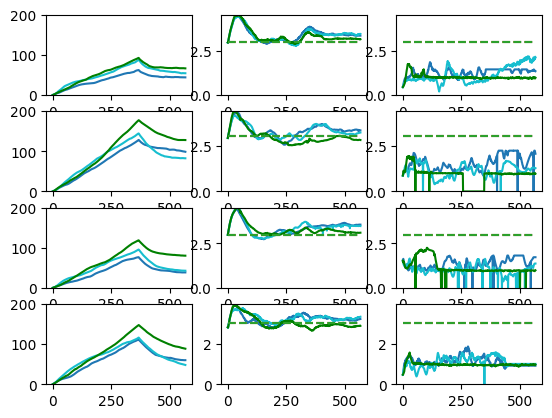

In [10]:
def plot_eval_row(axs, total_df, color="blue"):
    avg_goal, avg_obst, min_obst = get_eval_arrays(total_df, max_index)
    axs[0].plot(avg_goal, color=color)
    axs[0].set_ylim(top = 200)
    axs[1].plot(avg_obst, color=color)
    axs[1].plot([3]*len(avg_obst), linestyle="--")
    axs[2].plot(min_obst, color=color) 
    axs[2].plot([3]*len(min_obst), linestyle="--")
    axs[2].set_ylim(top = axs[1].get_ylim()[1])
    for ax in axs:
        ax.set_ylim(bottom = 0.0)

fig, axs = plt.subplots(len(error_strings),3)
for err, ax_row in zip(error_strings, axs):
    long_Multi_PSO_df, short_Multi_PSO_df, DWA_df = err_frame_dict[err]
    plot_eval_row(ax_row, long_Multi_PSO_df, "tab:blue")
    plot_eval_row(ax_row, short_Multi_PSO_df, "tab:cyan")
    plot_eval_row(ax_row, DWA_df, "green")


In [9]:
df = pandas.read_hdf("data\Map Experiment #2\9\DWA_data.h5")
print(df)
max_index

          robo_x      robo_y  robo_deg      goal_x  goal_y   goal_dist  \
0.0    50.000000  300.000000  0.000000   50.000000   300.0    0.000000   
0.1    51.542745  299.996242 -0.004872   51.363636   300.0    0.179148   
0.2    53.018691  299.999993 -0.009533   52.727273   300.0    0.291418   
0.3    54.449510  300.010400 -0.014051   54.090909   300.0    0.358752   
0.4    55.960577  300.028028 -0.018823   55.454545   300.0    0.506807   
...          ...         ...       ...         ...     ...         ...   
56.3  279.024862  305.335500 -0.226861  550.000000   300.0  271.027660   
56.4  279.102567  305.357246 -0.134841  550.000000   300.0  270.950400   
56.5  279.183546  305.364430 -0.227553  550.000000   300.0  270.869579   
56.6  279.258533  305.385340 -0.138776  550.000000   300.0  270.795021   
56.7  279.340058  305.392869 -0.232144  550.000000   300.0  270.713663   

      obst_dist  
0.0    3.125000  
0.1    3.221422  
0.2    3.313668  
0.3    3.403094  
0.4    3.497536  
...

567